# Understanding the Linear Regression

## Part 1 - Data pre-processing

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [2]:
data = pd.read_csv('consumo_cerveja.csv',sep = ',',decimal=',')

# sep =  Symbol separating data from each other
# decimal = symbol that separates decimal places (Python doesn't read 21,9 but 21.9)

In [3]:
data.head(1)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0.0,0.0,25.461


#### Changing the column names

In [4]:
data.columns = ['Date', 'Average_temp','Min_Temp','Max_Temp',
 'Precipitation','Weekend', 'Consume']

In [5]:
data.head(1)

,Date,Average_temp,Min_Temp,Max_Temp,Precipitation,Weekend,Consume
0,2015-01-01,27.3,23.9,32.5,0.0,0.0,25.461


#### Quantity of Null Data

In [6]:
round(data.isnull().sum()/len(data['Date']) * 100,2)

Date             61.21
Average_temp     61.21
Min_Temp         61.21
Max_Temp         61.21
Precipitation    61.21
Weekend          61.21
Consume          61.21
dtype: float64

In [7]:
data.shape

(941, 7)

#### Deleting Null Data

In [8]:
data.dropna(inplace = True)

In [9]:
data.shape

(365, 7)

In [10]:
print(f'You lost {round(((365-941)/941) * 100,2)} % of your data with this operation ')  

You lost -61.21 % of your data with this operation 


#### Data Type

In [11]:
data.dtypes

Date              object
Average_temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Weekend          float64
Consume           object
dtype: object

#### Changing the type of "Date" and "Consume" variables

In [12]:
data.Date = pd.to_datetime(data.Date)
#data.set_index('Data',inplace = True)

data.Consume = data.Consume.astype(str)
data.Consume = data.Consume.str.replace('.', '')

data['Consume'] = pd.to_numeric(data['Consume'])

## Part 2 - Data Analysis

#### Descriptive Statistic

In [13]:
data.describe()

,Average_temp,Min_Temp,Max_Temp,Precipitation,Weekend,Consume
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


#### Matrix Correlation

Attention - Correlation isn't Multicollinearity

In [14]:
data.corr(method='pearson')

,Average_temp,Min_Temp,Max_Temp,Precipitation,Weekend,Consume
Average_temp,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Min_Temp,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Max_Temp,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitation,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Weekend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consume,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [15]:
data.corr(method = 'spearman')

,Average_temp,Min_Temp,Max_Temp,Precipitation,Weekend,Consume
Average_temp,1.000000,0.864661,0.912867,0.017111,-0.039258,0.569998
Min_Temp,0.864661,1.000000,0.664436,0.166770,-0.050208,0.391495
Max_Temp,0.912867,0.664436,1.000000,-0.116672,-0.023907,0.641289
Precipitation,0.017111,0.166770,-0.116672,1.000000,0.003799,-0.172381
Weekend,-0.039258,-0.050208,-0.023907,0.003799,1.000000,0.497192
Consume,0.569998,0.391495,0.641289,-0.172381,0.497192,1.000000


#### Understanding the dependent variable behavior

Consume variable Time Series Behavior


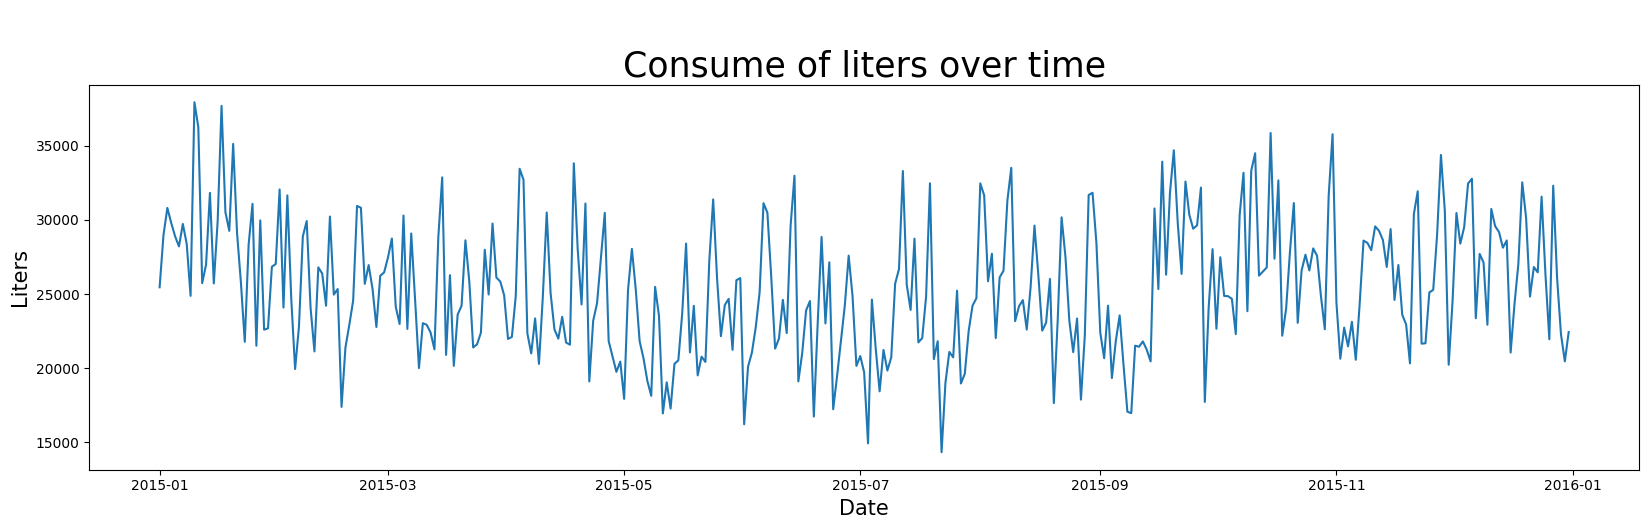

In [16]:
plt.figure(figsize = (20,5))

plt.title('\nConsume of liters over time',size = 25)
plt.plot(data['Date'],data['Consume'])
plt.xlabel('Date',size = 15)
plt.ylabel('Liters',size = 15)

plt.show()

#### Sazonality

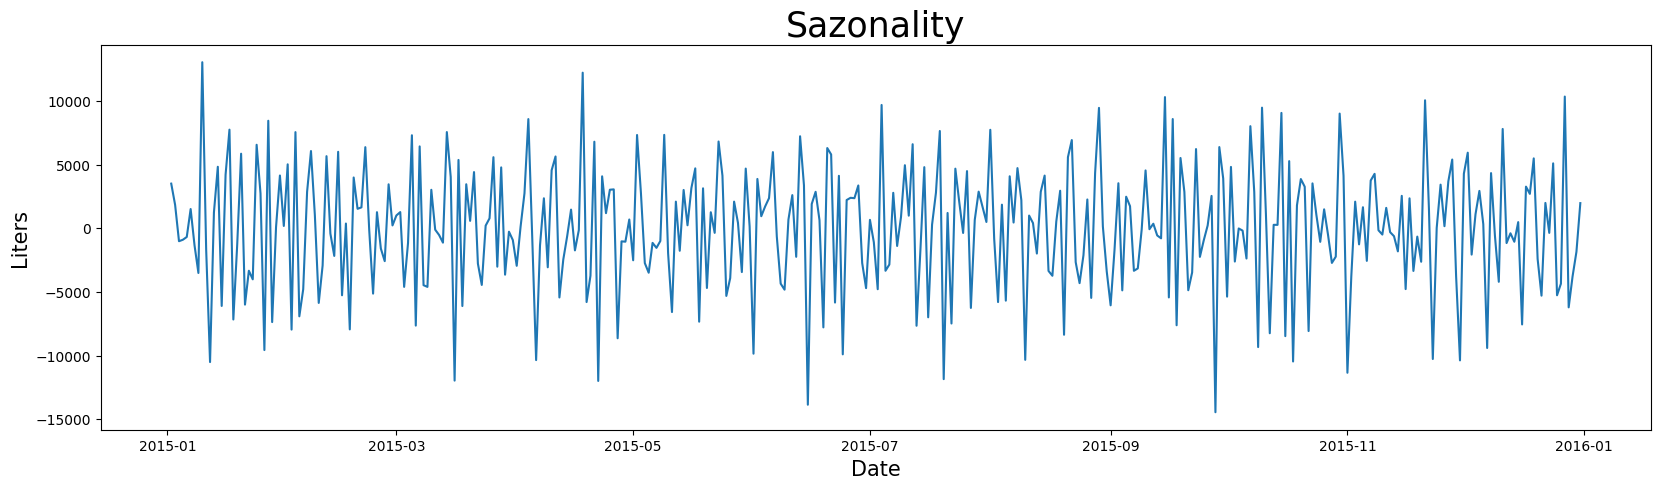

In [17]:
plt.figure(figsize = (20,5))

plt.title('Sazonality',size = 25)
plt.xlabel('Date',size = 15)
plt.ylabel('Liters',size = 15)

plt.plot(data['Date'],data['Consume'].diff())

plt.show()

#### Semi-Annual Moving Averages

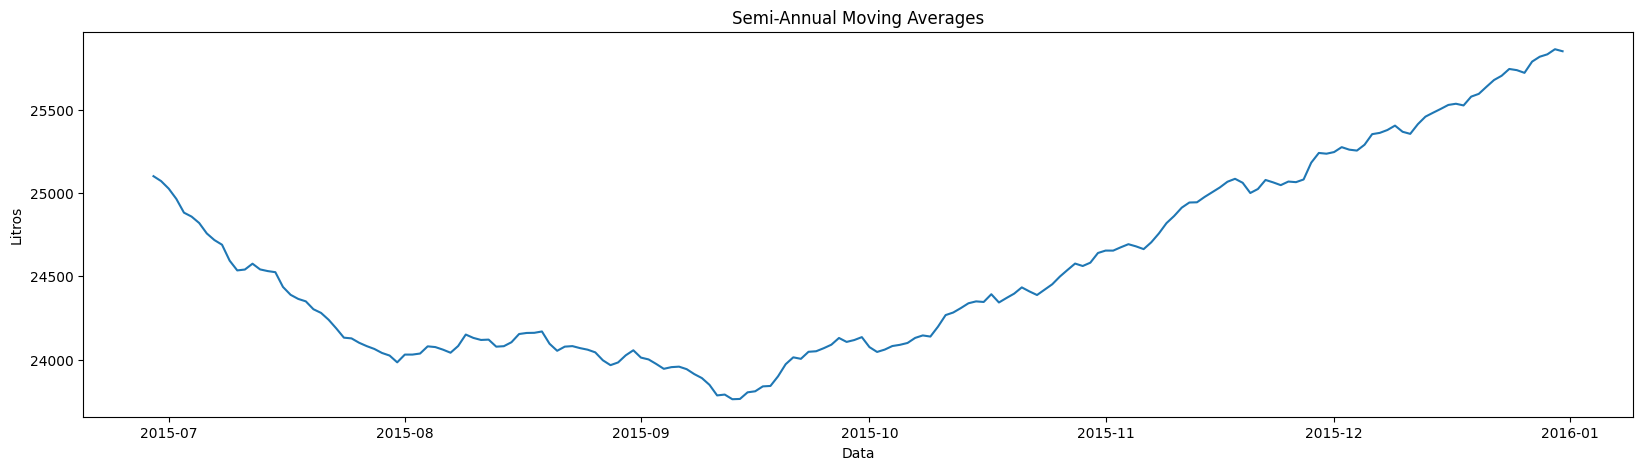

In [18]:
plt.figure(figsize = (20,5))

plt.title('Semi-Annual Moving Averages')
plt.xlabel('Data')
plt.ylabel('Litros')

plt.plot(data['Date'],data['Consume'].rolling(180).mean())

plt.show()

#### BoxPlot

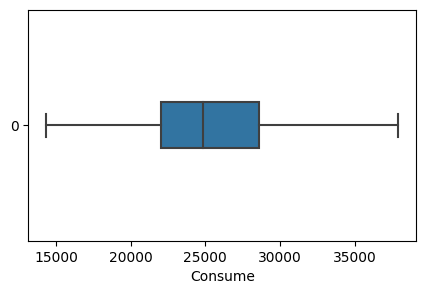

In [19]:
plt.figure(figsize = (5,3))

sns.boxplot(data = data['Consume'],orient = 'h',width = 0.2 )
plt.title('')
# orient - Defines whether the graph will be plotted Vertically (v) or Horizontally (h)
# width - Adjusts the width of the BoxPlot
plt.xlabel('Consume')
plt.show()

# In this case there aren't outliers

### Analyzing whether consumption increases or decreases on weekends

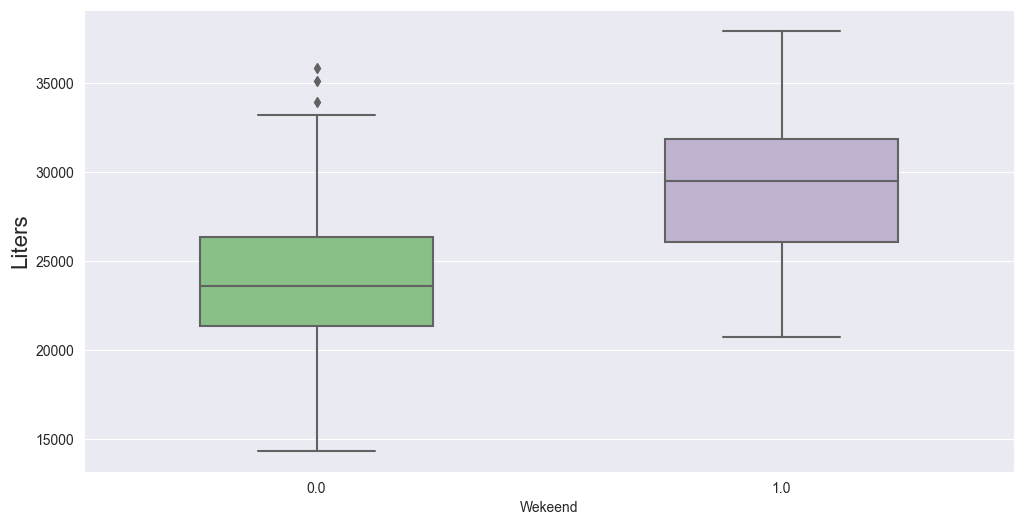

In [20]:
# To change the colors of the blocks
sns.set_palette('Accent')
# To change the chart style
sns.set_style('darkgrid')

#Plotando o gráfico
ax = sns.boxplot(y = 'Consume',x = 'Weekend',data = data,orient = 'v',width = 0.5 )

# Plotting the graph
ax.figure.set_size_inches(12,6)

# Changing the y-axis title
ax.set_ylabel('Liters',fontsize = 16)

# Changing the x-axis title
ax.set_xlabel('Wekeend')

plt.show()

# We can say that consumption increases on weekends

#### Distribution

##### Linear Regression Models initially assume that the dependent variable follows a normal distribution

Informal Test

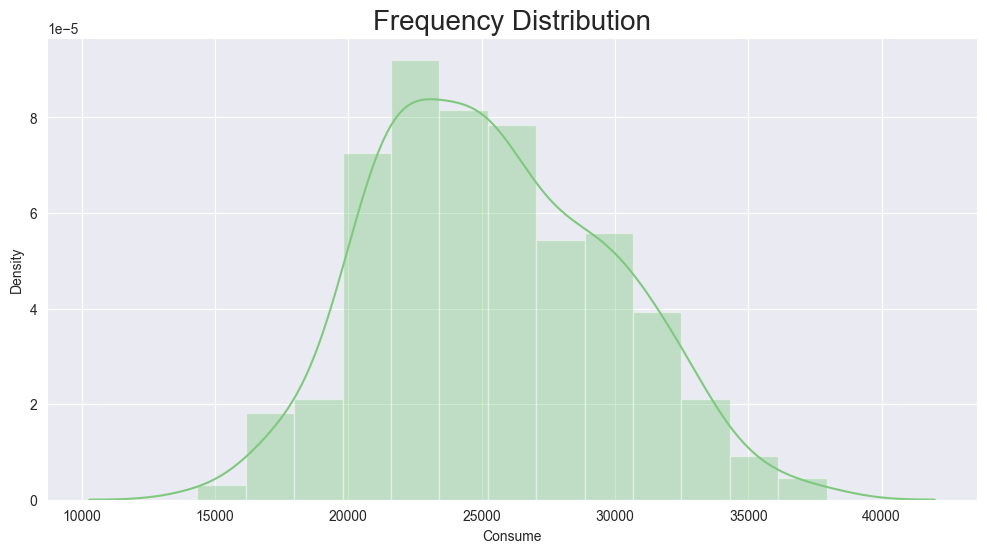

In [21]:
ax = sns.distplot(data['Consume'])
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Distribution',fontsize = 20)

plt.show()

Formal Test - Value-p

In [22]:
import scipy.stats as stats
from scipy.stats import normaltest
from scipy import stats

stat_test,p_value = normaltest(data['Consume'])

p_value = p_value

if p_value < 0.05:
    print(f'These data follow a Normal Distribution, p-value of {round(p_value,4)}')
else:
    print(f'These Data do not follow a Normal Distribution, p value of {round(p_value,4)}')

These data follow a Normal Distribution, p-value of 0.0197


#### Analyzing the dependent variable (Y) with explanatory variables (X)

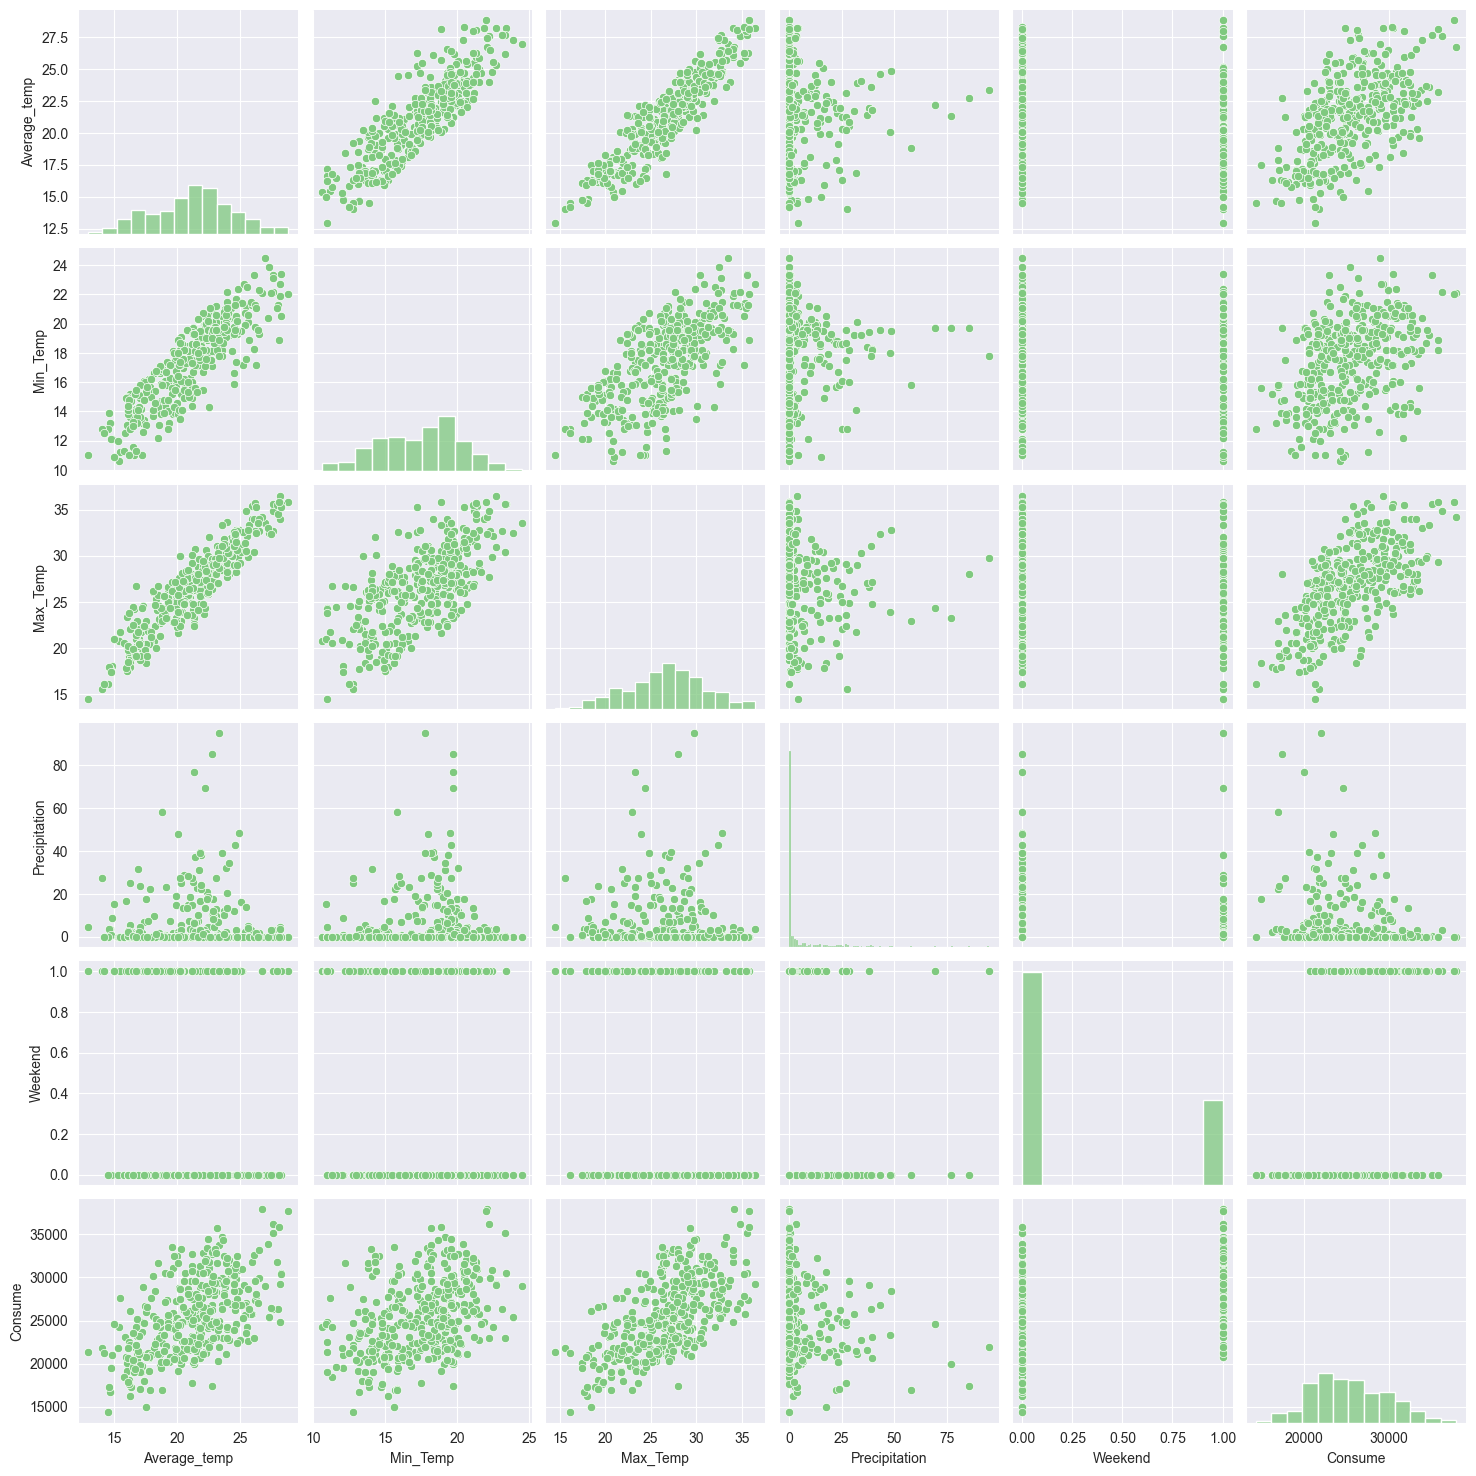

In [23]:
ax = sns.pairplot(data)

#### Plotting the pairplot just by fixing a variable on the Y axis

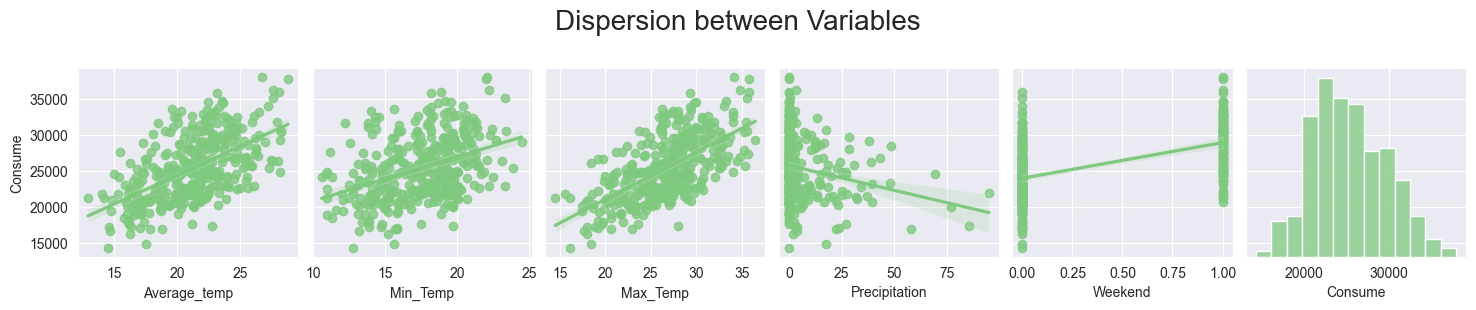

In [24]:
ax = sns.pairplot(data, y_vars = 'Consume', x_vars = ['Average_temp','Min_Temp','Max_Temp',
                'Precipitation','Weekend','Consume'],kind = 'reg')

# In the kind the default will be scatter, but we can use 'reg' to plot a line
ax.fig.suptitle('Dispersion between Variables',fontsize = 20,y = 1.20)
plt.show()

# We can observe that, the higher the temperature, the more people drink
# The more it rains the less people drink
# People drink more on the weekend

#### joinplot - Plots the relationship between two variables and their respective frequency distributions

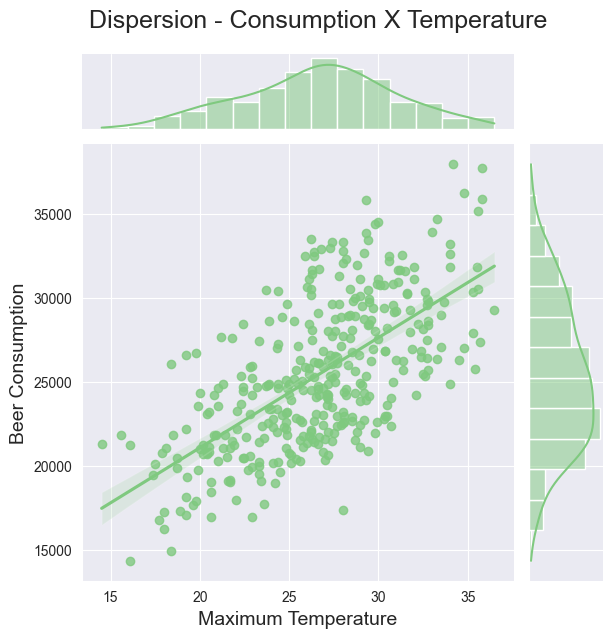

In [25]:
ax = sns.jointplot(x = 'Max_Temp',y = 'Consume',data = data,kind = 'reg')

ax.figure.suptitle('Dispersion - Consumption X Temperature',fontsize = 18,y = 1.05)
ax.set_axis_labels('Maximum Temperature','Beer Consumption',fontsize = 14)

plt.show()

#### lmplot - Plots the regression line between two variables with the dispersion between them

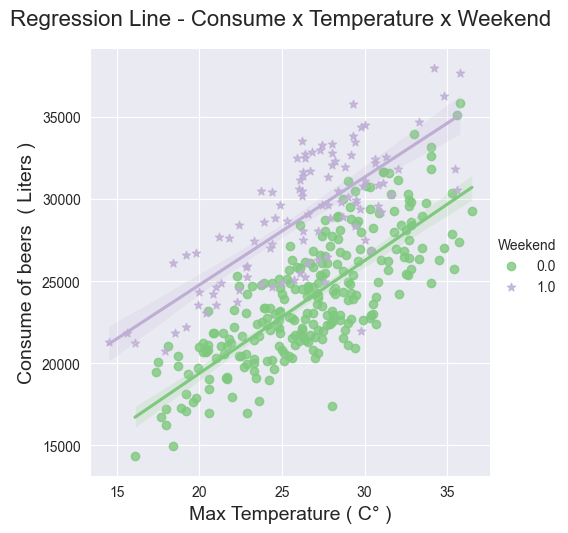

In [26]:
ax = sns.lmplot(x = 'Max_Temp',y = 'Consume',data = data,hue = 'Weekend',
                markers = ['o','*'], legend = False)

ax.fig.suptitle('Regression Line - Consume x Temperature x Weekend',
               fontsize = 16, y = 1.05)

ax.set_xlabels('Max Temperature ( C° )',fontsize = 14)
ax.set_ylabels('Consume of beers  ( Liters )',fontsize = 14)
ax.add_legend(title = 'Weekend')
plt.show()

#### In a similar way, however, separating the graphics, we just replace "hue" with "col"

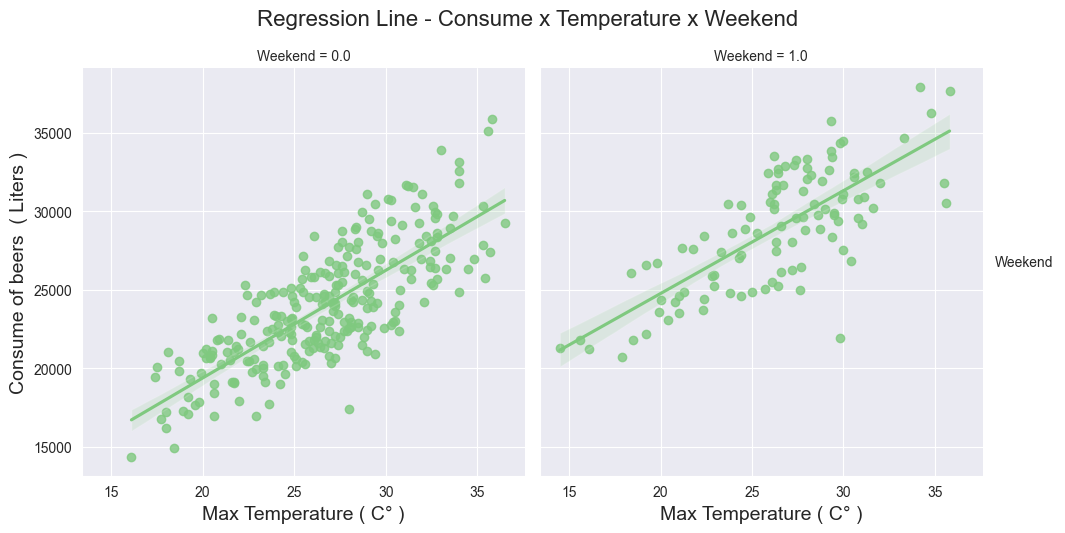

In [27]:
ax = sns.lmplot(x = 'Max_Temp',y = 'Consume',data = data,col = 'Weekend')

ax.fig.suptitle('Regression Line - Consume x Temperature x Weekend',
               fontsize = 16, y = 1.05)

ax.set_xlabels('Max Temperature ( C° )',fontsize = 14)
ax.set_ylabels('Consume of beers  ( Liters )',fontsize = 14)
ax.add_legend(title = 'Weekend')
plt.show()

## Part 3 - Linear Regression: Creating the model

#### Importing the train_test_split library

In [28]:
from sklearn.model_selection import train_test_split

#### Separating the "Target" and "Features" variables

In [29]:
y = data['Consume']

# Don't forget to use two brackets
# Don't use variables very correlated between them
x = data[['Max_Temp','Precipitation',
         'Weekend']]

#### Creating the training and testing datasets

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 2811)

##### Checking the size of generated files

In [31]:
print('Train - ',x_train.shape[0])
print('Test - ',x_test.shape[0])

Train -  255
Test -  110


#### Importing the Linear Regression library through Sklearn

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Creating the Model

In [33]:
model = LinearRegression()

#### Using training and test data to train the model

In [34]:
model.fit(x_train,y_train)

LinearRegression()

#### Obtain the R² determination coefficient for the TRAINING data (How much our line can explain our Y variable)

In [35]:
print(f'R² = {round(model.score(x_train,y_train),2)}')


R² = 0.73


#### Getting the Coefficient of Determination R² for the TEST data

In [36]:
print(f'The R² = {round(model.score(x_test,y_test),2)}')

The R² = 0.69


# Part 4 - Linear Regression: Making Forecasts

#### Input Data

In [37]:
input = x_test[0:1]
input

,Max_Temp,Precipitation,Weekend
5,30.5,12.2,0.0


#### Making the prediction

In [38]:
predict = model.predict(input)[0]
predict.round(2)

26094.9

#### Criando um simulador simples

In [39]:
Max_Temp = 30.5
Precipitation = 12.2
Weekend  = 0
input = [[Max_Temp,Precipitation,Weekend]]
print(f'{model.predict(input)[0].round(2)}')

26094.9


# Part 5 - Linear Regression - Interpreting the Models

#### Getting the coefficients

In [40]:
model.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [41]:
type(model.coef_)

numpy.ndarray

#### Confirming the Order of Variables

In [42]:
x.columns


Index(['Max_Temp', 'Precipitation', 'Weekend'], dtype='object')

#### Creating a list with the name of model variables

In [43]:
index = ['Intercept','Max Temperature','Rain (mm)','Weekend']


pd.DataFrame(data = np.append(model.intercept_,model.coef_),
             index = index,columns = ['Parâmetros'])

,Parâmetros
Intercept,5951.976339
Max Temperature,684.736759
Rain (mm),-60.782435
Weekend,5401.083339


# Part 6 - Linear Regression: Graphical Analysis of the Model's prediction

In [44]:
y_train_predicted = model.predict(x_train)

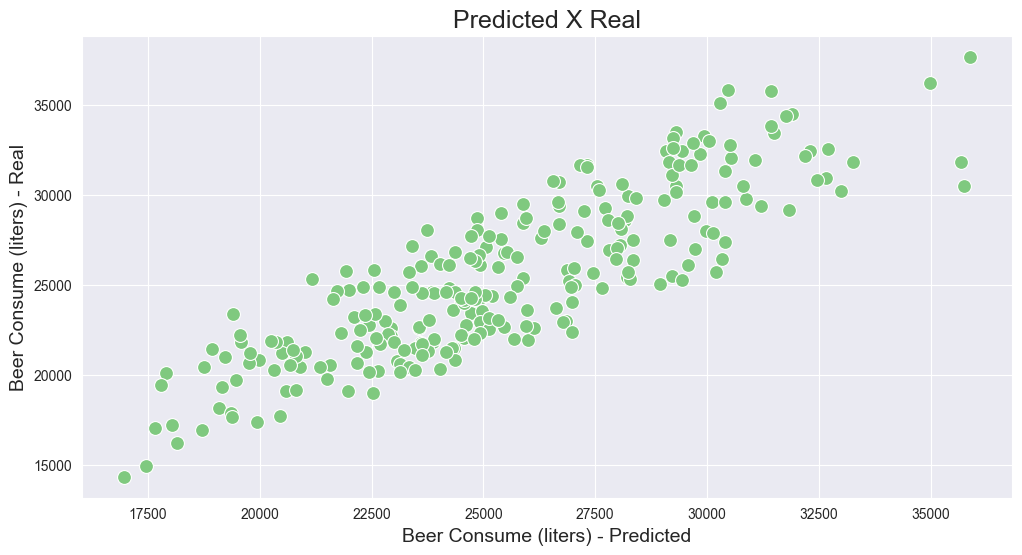

In [46]:
ax = sns.scatterplot(x=y_train_predicted,y=y_train,s = 100)
ax.figure.set_size_inches(12,6)
ax.set_title('Predicted X Real',fontsize = 18)
ax.set_xlabel('Beer Consume (liters) - Predicted',fontsize = 14)
ax.set_ylabel('Beer Consume (liters) - Real',fontsize = 14)
plt.show()


#### Getting the residuals

In [50]:
residual = y_train - y_train_predicted

#### Scatter plot between estimated value and residuals

It serves to see if the model is valid or not. (homocedasticity)

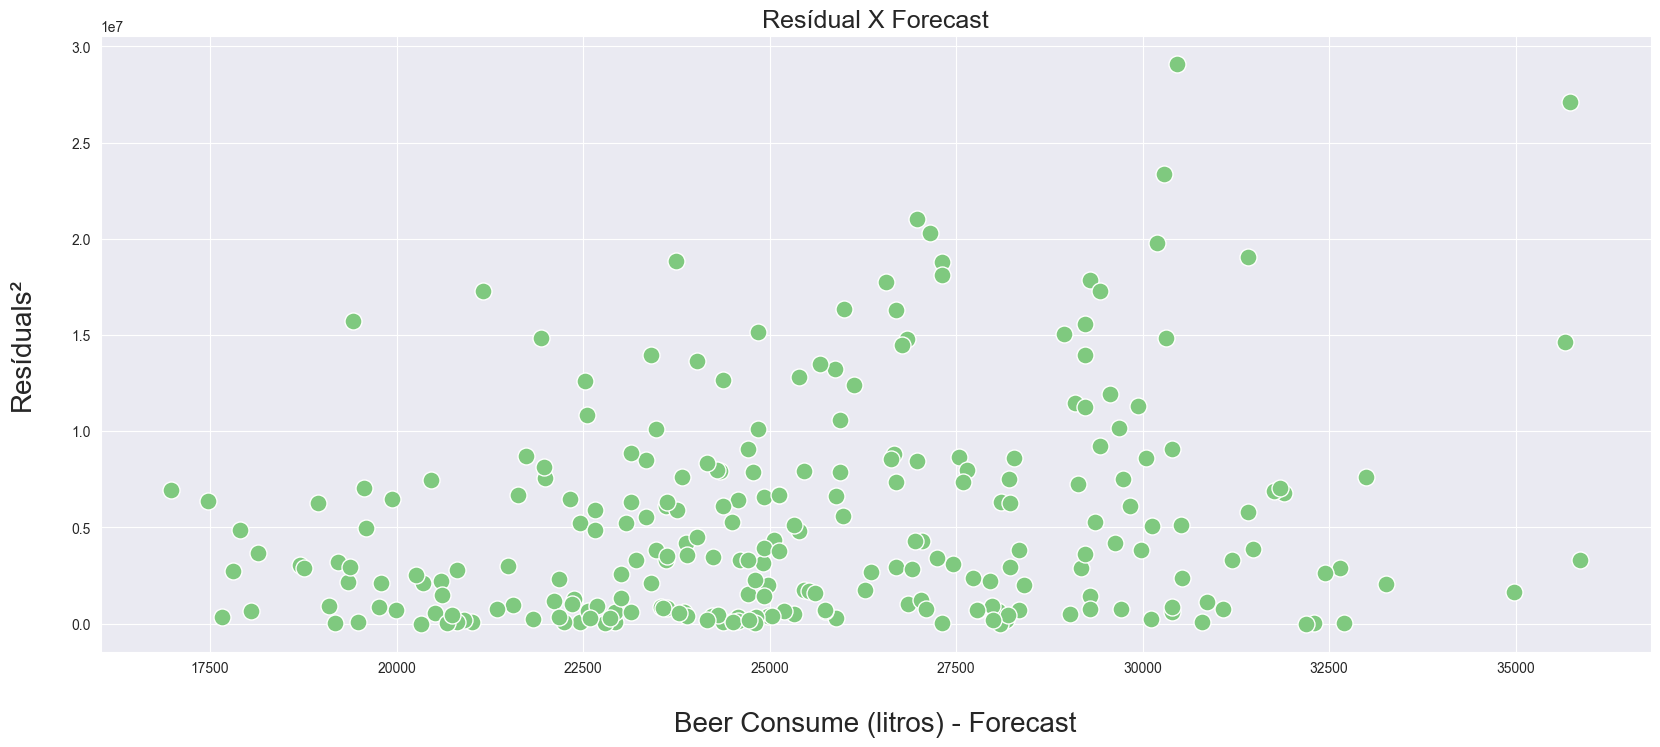

In [53]:
ax = sns.scatterplot(x=y_train_predicted,y=residual**2,s = 150)

# s - Aumenta as bolinhas 

ax.figure.set_size_inches(20,8)
ax.set_title('Resídual X Forecast', fontsize = 18)
ax.set_xlabel('\nBeer Consume (litros) - Forecast',fontsize = 20)
ax.set_ylabel('Resíduals²\n',fontsize = 20)

plt.show()

# Part 7 - Comparing Models

A very common work in Data Science, in Linear Regression models we need to test several combinations of variables even because we often need to exclude data to avoid multicollinearity problems and not have our model invalid

#### Criando um novo modelo

In [54]:
data.head()

,Date,Average_temp,Min_Temp,Max_Temp,Precipitation,Weekend,Consume
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900


In [56]:
x2 = data[['Average_temp','Precipitation','Weekend']]

In [57]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y,test_size = 0.30,random_state = 2811)

In [58]:
model_2 = LinearRegression()

In [59]:
model_2.fit(x2_train,y2_train)

LinearRegression()

In [60]:
model_2.score(x2_train,y2_train)

0.6617640611940382

In [61]:
model_2.score(x2_test,y2_test)

0.6574588953371101

In [63]:
# Max Temperature Model

print('Max Temperature Model\n')
print(f'Train R² = {model.score(x_train,y_train).round(2)}')
print(f'Test R² = {model.score(x_test,y_test).round(2)}')

Max Temperature Model

Train R² = 0.73
Test R² = 0.69


In [64]:
# Average Temperature Model

print('Average Temperature ')
print(f'Train R² = {model_2.score(x2_train,y2_train).round(2)}')
print(f'Test R² = {model_2.score(x2_test,y2_test).round(2)}')

Average Temperature 
Train R² = 0.66
Test R² = 0.66


#### Other Metrics

R² alone is not enough, requiring the analysis of other metrics to better validate the model

#### Max Temperature Model

In [66]:
y_previsto = model.predict(x_test)

EQM = metrics.mean_squared_error(y_test,y_previsto)
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto))
R2 = metrics.r2_score(y_test,y_previsto)

pd.DataFrame([EQM.round(2),REQM.round(2),R2.round(2)],['EQM','REQM','R²'], columns = ['Metrics'])

,Metrics
EQM,5471976.38
REQM,2339.23
R²,0.69


#### Average Temperature Model

In [67]:
y2_previsto = model_2.predict(x2_test)

EQM_2 = metrics.mean_squared_error(y2_test,y2_previsto)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test,y2_previsto))
R2_2 = metrics.r2_score(y2_test,y2_previsto)

pd.DataFrame([EQM_2.round(2),REQM_2.round(2),R2_2.round(2)],
                    ['EQM','REQM','R²'], columns = ['Metrics'])

,Metrics
EQM,6060775.46
REQM,2461.86
R²,0.66
